# <center>NLP für Arabisch mit CAMeL Tools</center>

<img src="./assets/images/banner.png" /><br>

____

## 1 Überblick über den Datenbestand beschaffen

In [297]:
# Erstellen des Dataframes
import pandas as pd

tafasir = pd.read_csv("./assets/tafasir.csv", sep=";").set_index("Id")

In [298]:
# Ausgabe des Dataframes
tafasir

,MadhabId,TableName,DateOfDeath,TafsirName,LanguageId,Transliteration,AuthorName
Id,,,,,,,
1,1,Al_Tabari,(ت 310 هـ),جامع البيان في تفسير القرآن/ الطبري,1,Ǧāmiʿ al-bayān fī tafsīr al-Qurʾān,aṭ-Ṭabarī
2,1,Al_Kashaf,(ت 538 هـ),الكشاف/ الزمخشري,1,al-Kaššāf,az-Zamaḫšarī
3,4,Al_Tabrasi,(ت 548 هـ),مجمع البيان في تفسير القرآن/ الطبرسي,1,Maǧmaʿ al-bayān fī tafsīr al-Qurʾān,aṭ-Ṭabarsī
4,1,Al_Razi,(ت 606 هـ),مفاتيح الغيب ، التفسير الكبير/ الرازي,1,"Mafātīḥ al-ġayb, at-tafsīr al-kabīr",ar-Rāzī
5,1,Al_Qurtobi,(ت 671 هـ),الجامع لاحكام القرآن/ القرطبي,1,al-Ǧāmiʿ li-aḥkām al-Qurʾān,al-Qurṭubī
...,...,...,...,...,...,...,...
108,3,Al_Qushairi_Eng,NaN,Al Qushairi Tafsir,2,Tafsīr al-Qušayrī,Abū al-Qāsim al-Qušayrī
109,2,Kashf_AlAsrar_Eng,NaN,Kashf Al-Asrar Tafsir,2,Tafsīr kašf al-asrār,Rašīd ad-Dīn al-Maybūdī
110,4,Al_Bahrani,(ت 1107هـ),البرهان في تفسير القرآن/ هاشم الحسيني البحراني,1,al-Burhān fī tafsīr al-Qurʾān,Hāšim al-Ḥusaynī al-Baḥrānī


___________

## 2 Sample beschaffen

In [299]:
import tafsir_extractor as te

### 2.1 Ein Sample von altafsir.com extrahieren <a id="resume"></a>

In [300]:
#sample = te.tafsir_sample(TafsirId, Sura, Aya)
#sample.collect_data()

### 2.2 Alternativ: aus Datei laden

In [301]:
sample = te.tafsir_sample(67,1,6)
with open(f"./data/{sample.TafsirId}-{sample.Sura}_{sample.Aya}.txt", "r", encoding="utf-8") as f:
    sample.Text = f.read()

____

## 3 Preprocessing

### 3.1 Normalisierung der Daten
- alle Unicode-Zeichen normalisieren (z.B. `\xa0` zu Leerzeichen),
- alle Diakritischen Zeichen,
- Koranzitate, Querverweise auf andere Koranverse, Eulogien
- sowie alle Zeichen, die nicht zu den Konsonanten und Halbvokalen des Arabischen Kernalphabets gehören, entfernen


In [302]:
import normalizer
sample.Normalized = normalizer.normalize(sample.Text)

In [303]:
sample.Normalized

'   يعنى نوحد  كقوله سبحانه في المفصل   يعنى موحدات    على عبادتك     يعنى دين الإسلام  لأن غير دين الإسلام ليس بمستقيم  وفى قراءة ابن مسعود  ارشدنا     يعنى دلنا على طريق الذين أنعمت عليهم  يعنى النبيين الذين أنعم  عليهم بالنبوة  كقوله سبحانه       يعنى دلنا على دين غير اليهود الذين غضب  عليهم  فجعل منهم القردة والخنازير     يقول  ولا دين المشركين  يعنى النصارى قال  حدثنا عبيد  قال حدثنى أبى  عن الهذيل  عن مقاتل  عن مرثد  عن أبى هريرة  أن رسول   قال    يقول    قسمت هذه السورة بينى وبين عبدى نصفين  فإذا قال العبد     يقول    شكرنى عبدى  فإذا قال     يقول   مدحنى عبدى  فإذا قال     يقول   أثنى على عبدى  ولعبدى بقية السورة  وإذا قال     يقول   هذه لعبدى إياى يستعين  وإذا قال     يقول   فهذه لعبدى  وإذا قال     يقول   فهذه لعبدى     فهذه لعبدى     قال  حدثنا عبيد   قال  حدثنى أبى  قال  حدثنا الهذيل  عن مقاتل  قال إذا قرأ أحدكم هذه السورة فبلغ خاتمتها  فقال     فليقل  آمين  فإن الملائكة تؤمن  فإن وافق تأمين الناس  غفر للقوم ما تقدم من ذنوبهم قال  حدثنا عبيد   قال  حدثنى أبى  قال  حدثنى هذي

### 3.2 Tokenisierung

In [304]:
from camel_tools.tokenizers.word import simple_word_tokenize

sample.Tokenized = simple_word_tokenize(sample.Normalized)

### 3.3 Disambiguierung
<a href="https://camel-tools.readthedocs.io/en/latest/reference/camel_morphology_features.html#camel-morphology-features">CAMeL Morphology Features</a>.

<center><img src="./assets/images/MLED_output_tree.png" /><br></center>

In [305]:
from camel_tools.disambig.mle import MLEDisambiguator

# Eine Instanz des Maximum Likelihood Disambiguator wird aufgerufen
mle = MLEDisambiguator.pretrained()

# Der Text wird in tokenisierter Form übergeben
sample.Disambiguated = mle.disambiguate(sample.Tokenized)

In [306]:
sample.Disambiguated[2].analyses[0].analysis["stemgloss"]

'statement;remark'

### 3.4 Filtern unerwünschter Wörter

In [307]:
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.dediac import dediac_ar

for i, val in enumerate(sample.Disambiguated):
    normalized = normalize_alef_ar(dediac_ar(val.analyses[0].analysis["lex"]))
    sample.Disambiguated[i].normalized = normalized

In [308]:
sample.Filtered = sample.Disambiguated.copy()

#### 3.4.1 Durch Part-Of-Speech-Tags

In [309]:
for i in enumerate(sample.Filtered):
    if sample.Filtered[i[0]].analyses[0].analysis["pos"] in ("conj", "prep", "pron", "abbrev", "pron_dem", "conj_sub"):
        sample.Filtered.pop(i[0])

#### 3.4.2 Mittels Stopwortliste

In [310]:
# Stopwortliste aus NLTK extrahiert
with open("./assets/stopwords_nltk.txt", "r", encoding="utf-8") as sf:
    stopwords_nltk = normalize_alef_ar(dediac_ar(sf.read()))

# Zusätzliche Stopwörter
with open("./assets/stopwords_extra.txt", "r", encoding="utf-8") as sf:
    stopwords_extra = normalize_alef_ar(dediac_ar(sf.read()))

stopwords = stopwords_nltk + " " + stopwords_extra
stopwords = stopwords.split()

In [311]:
def del_stopwords(token_list, stopwords_list):
    """Entfernt alle in der Stopwortliste vorhandenen Einträge
    aus dem Datensatz der disambiguierten Tokens."""
    tokens_kept = []
    for token in token_list:
        if token.normalized in stopwords_list:
            pass
        else:
            tokens_kept.append(token)
            pass

    return tokens_kept

In [312]:
sample.Filtered = del_stopwords(sample.Filtered, stopwords)


____

## 4 Visualisierung

In [315]:
## Funktionen
# Unterscheidung ob Arabisch oder Lateinische Buchstaben
def check_script(string):
    import re
    
    string = re.sub("\W", "", str(string))
    arabic = '[\u0621-\u064A\W]'
    pattern = re.compile(arabic)
    
    if type(pattern.match(string)) == type(pattern.match("d")):
        return "lat"
    else:
        return "ar"

# Zählalgorithmus
def zaehler(gen, no):
    from collections import Counter

    counted_tuple = Counter(gen).most_common(no)   
    output = {k:v for k, v in counted_tuple}
    
    return output

# Output in Datei
def write_freqs_file(counts, parameter, TafsirId=sample.TafsirId, Sura=sample.Sura, Aya=sample.Aya):
    outfile = f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_freqs.csv"
    with open(outfile, 'w', encoding="utf-8") as f:
        for key in counts.keys():
            f.write("%s, %s\n" % (key, counts[key]))
    return print("written successfully to:", outfile)


def reshape(dictionary):
    from arabic_reshaper import reshape
    from bidi.algorithm import get_display

    output = {}
    rtl = lambda w: get_display(reshape(f'{w}'))
    for key in dictionary.keys():
        output[rtl(key)] = dictionary[key]
    return output


# Wordcloud erstellen
def make_wordcloud(counts, write_file=True):
    import matplotlib.pyplot as plt          
    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color="white",
                        width=400,
                        height=200)

    if check_script(list(counts.keys())[0]) == "ar":
        font_file = './assets/fonts/NotoNaskhArabic-Regular.ttf'
        wordcloud.font_path = font_file
        wordcloud.generate_from_frequencies(reshape(counts))
    else:
        wordcloud.generate_from_frequencies(counts)

    
    if write_file == True:
        wordcloud.to_file(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_wc.png")
    else:
        pass

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### 4.1 Häufigkeiten von Lemmata

written successfully to: ./output/67-1_6_lex_freqs.csv


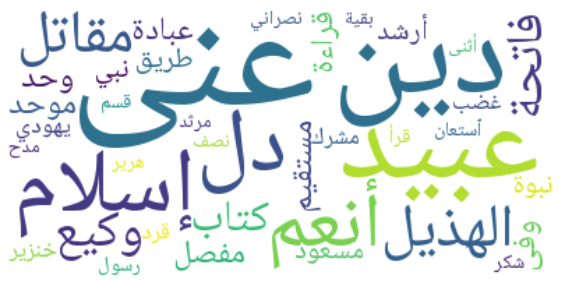

In [316]:
##Variablen
parameter = "lex"
gen = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Filtered]


haeufigkeiten = zaehler(gen, 40)
write_freqs_file(haeufigkeiten, parameter)
make_wordcloud(haeufigkeiten)


In [328]:
for i in sample.Disambiguated:
    print(i)

DisambiguatedWord(word='يعنى', analyses=[ScoredAnalysis(score=1.0, analysis={'diac': 'يُعْنَى', 'lex': 'عَنَى', 'bw': 'يُ/IV3MS+عْنَى/IV_PASS', 'gloss': 'he;it+be_meant;be_signified', 'pos': 'verb', 'prc3': '0', 'prc2': '0', 'prc1': '0', 'prc0': '0', 'per': '3', 'asp': 'i', 'vox': 'p', 'mod': 'u', 'stt': 'na', 'cas': 'na', 'enc0': '0', 'rat': 'n', 'source': 'lex', 'form_gen': 'm', 'form_num': 's', 'd3seg': 'يُعْنَى', 'caphi': 'y_u_3_n_aa', 'd1tok': 'يُعْنَى', 'd2tok': 'يُعْنَى', 'pos_logprob': -1.023208, 'd3tok': 'يُعْنَى', 'd2seg': 'يُعْنَى', 'pos_lex_logprob': -3.494755, 'num': 's', 'ud': 'VERB', 'gen': 'm', 'catib6': 'VRB-PASS', 'root': 'ع.ن.#', 'bwtok': 'يُ+_عْنَى', 'pattern': 'يُ1ْ2َى', 'lex_logprob': -3.494755, 'atbtok': 'يُعْنَى', 'atbseg': 'يُعْنَى', 'd1seg': 'يُعْنَى', 'stem': 'عْنَى', 'stemgloss': 'be_meant;be_signified', 'stemcat': 'IV_0_Pass_yu'})])
DisambiguatedWord(word='نوحد', analyses=[ScoredAnalysis(score=1.0, analysis={'diac': 'نُوَحِّد', 'lex': 'وَحَّد', 'bw': 'نُ/IV

### 4.2 Häufigkeiten von Stammbedeutungen

written successfully to: ./output/67-1_6_stemgloss_freqs.csv


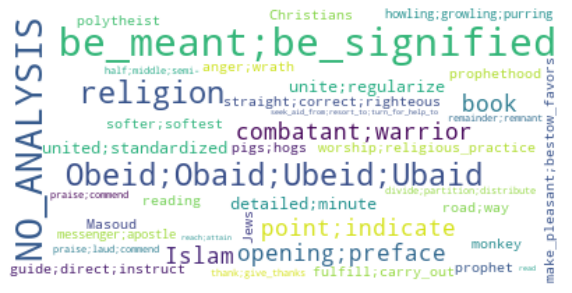

In [317]:
##Variablen
parameter = "stemgloss"
gen = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Filtered]

haeufigkeiten = zaehler(gen, 40)
write_freqs_file(haeufigkeiten, parameter)
make_wordcloud(haeufigkeiten)


### 4.3 Relative Häufigkeiten Part-Of-Speech-Tags (ungefilterter Text)

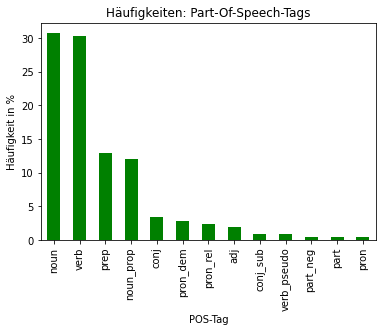

In [318]:
import matplotlib.pyplot as plt

# Auswahl des gewünschten Parameters
parameter = "pos"
gen = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Disambiguated]


# Konversion in %
output = {}
counts = zaehler(gen, 20)
for key in counts.keys():
    output[key] = counts[key]*100/len(sample.Disambiguated)


pd.Series(output).plot(kind="bar",
                       title="Häufigkeiten: Part-Of-Speech-Tags",
                       xlabel="POS-Tag",
                       ylabel="Häufigkeit in %",
                       colormap="ocean")
plt.savefig(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_barchart.png")
plt.show()

## 5 Named Entity Recognition (NER)

In [319]:
import NER

sample.Names = NER.NER_getter(sample.Tokenized)

written successfully to: ./output/67-1_6_PERS_freqs.csv


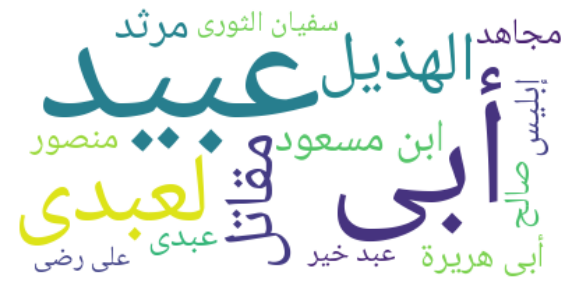

In [320]:
##Variablen
parameter = "PERS"
names_abbr = {"PERS" : "person", "LOC": "location", "ORG": "organization", "MISC": "other"}
gen = [Name for Name in sample.Names[parameter]]

if len(gen) > 0:
    haeufigkeiten = zaehler(gen, 20)
    write_freqs_file(haeufigkeiten, parameter)
    make_wordcloud(haeufigkeiten)
else:
    print(f"No {names_abbr[parameter]} identified")

## 6 From Sample to Corpus

### 6.1 Exporting Data to file format keeping object structure using pickle

#### 6.1.1 Writing pickle

In [321]:
import pickle
with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.pkl', 'wb') as outp:
    pickle.dump(sample, outp, pickle.HIGHEST_PROTOCOL)

#### 6.1.2 loading pickle

In [322]:
# with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.pkl', 'rb') as inp:
#     sample = pickle.load(inp)

### 6.1 Exporting Data to human readable format: JSON
#### 6.2.1 Writing JSON

In [323]:
# import json

# with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.json', 'w', encoding='utf8') as json_file:
#     json.dump(sample.__dict__, json_file, ensure_ascii=False)

#### 6.2.2 Reading JSON

In [324]:
# with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.json', 'r', encoding='utf8') as json_file:
#     sample_json = json.load(json_file)